In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [9]:
sample = pd.read_csv('sample_data/25k_reviews.csv')
tokens = pd.read_csv('sample_data/25k_processed_text.csv',header=None)

In [5]:
pd_yelp_train = pd.read_csv("../data/10k_restaraunt_with_predicted.csv")

In [6]:
pd_yelp_train.head()

Unnamed: 0                      id             business_id  \
0           0  hlpeSi-8jUVH9wi5F7V7Lg  hEcn9k6ONd5n2mq0lB2aew   
1           1  j6LgY0Tn7utjMuVY5aRKvg  C2BR0TjNacoNzItPLUHTAA   
2           2  iylX09P9t1kVBUFmoulVnA  _r-OvLO5wqncmsBCg3i0qw   
3           3  9xkBoZYlFSlRRz-4mrc70Q  ruPFtD9dU6Cv9_wpzIR4UQ   
4           4  D0EOKzTcCKq_7nZ6OtesNg  NpFtNc51LaZr8Y5_o2wRaw   

                  user_id  stars                 date  \
0  MaWfQRi7TEl3W72J5KKadw      4  2016-11-20 00:00:00   
1  W2K94WPhkHNHXMiaAIA7Jg      4  2016-01-28 00:00:00   
2  xrUwcIx4szcFlxFJ6waiFw      4  2016-04-08 00:00:00   
3  Ms78AU5hA0PY_CWgS0hUKg      2  2014-07-14 00:00:00   
4  eLzaX8tArcVTI9qOrZxHJw      4  2013-11-14 00:00:00   

                                                text  useful  funny  cool  \
0  Glad to have JB's in Sun City.  Food is the be...     1.0    0.0   1.0   
1  Very good food and they have longboard on tap....     0.0    0.0   0.0   
2  We were very happy that  we were able find/ord...     1.0    0.0   0.0   
3  This place has horrible customer service. I we...     2.0    0.0   0.0   
4  This is one of my favorite places to eat. The ...     0.0    0.0   0.0   

   pred_stars  
0           4  
1           4  
2           4  
3           1  
4           4

In [21]:
pd_yelp_train.stars.value_counts()

5.0    3766
4.0    2678
3.0    1363
1.0    1170
2.0    1024
Name: stars, dtype: int64

In [25]:
pd_yelp_train.stars = pd_yelp_train.stars.fillna(0).astype(int)

## Turn Tokens into Sparse Matrix

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [10]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [11]:
sparse = CountVectorizer(analyzer=text_process).fit(pd_yelp_train['text'].apply(lambda x: str(x)))

In [13]:
X = sparse.transform(pd_yelp_train['text'].apply(lambda x: str(x)))

In [26]:
y = pd_yelp_train['stars'].apply(lambda x: int(x))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5432)

In [28]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
preds = nb.predict(X_test)

In [31]:
preds

array([4, 1, 5, ..., 4, 5, 5])

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
# print(confusion_matrix(y_test, preds))
# print('\n')
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.65      0.72      0.68       305
          2       0.28      0.05      0.08       306
          3       0.37      0.10      0.16       419
          4       0.38      0.56      0.46       783
          5       0.67      0.76      0.71      1188

avg / total       0.51      0.54      0.50      3001



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [50]:
pred_stars = nb.predict(X)

In [52]:
pd_yelp_train['pred_stars'] = pred_stars

In [54]:
pd_yelp_train.to_csv('10k_restaraunt_with_predicted.csv')

3001

10002

In [33]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=300)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=300, random_state=None)

In [34]:
abc_preds = abc.predict(X_test)

In [35]:
print(classification_report(y_test,abc_preds))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.46      0.24      0.32       305
          2       0.12      0.81      0.21       306
          3       0.26      0.04      0.07       419
          4       0.27      0.08      0.12       783
          5       0.67      0.29      0.41      1188

avg / total       0.43      0.25      0.26      3001



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


n_estimators = 750
```
             precision    recall  f1-score   support

          1       0.71      0.62      0.66      1059
          2       0.29      0.26      0.28       611
          3       0.36      0.29      0.32       883
          4       0.41      0.40      0.40      1725
          5       0.69      0.77      0.73      3222

avg / total       0.56      0.57      0.56      7500
```




n_estimators = 300
```
             precision    recall  f1-score   support

          1       0.70      0.66      0.68      1059
          2       0.33      0.27      0.30       611
          3       0.39      0.28      0.33       883
          4       0.42      0.38      0.40      1725
          5       0.68      0.80      0.73      3222

avg / total       0.56      0.58      0.57      7500

```

Confusion matrix, without normalization
             precision    recall  f1-score   support

          1       0.65      0.75      0.70      1059
          2       0.24      0.05      0.08       611
          3       0.30      0.10      0.15       883
          4       0.39      0.54      0.45      1725
          5       0.71      0.76      0.74      3222

avg / total       0.54      0.57      0.54      7500



TypeError: Image data can not convert to float

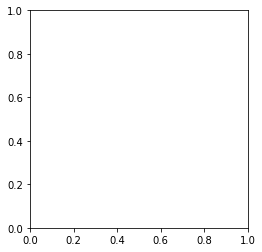

In [39]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(classification_report(y_test, preds), np.array(['1','2','3','4','5']))

In [34]:
bus = pd.read_json('business.json',lines=True)

In [35]:
bus.filter()

address  \
0        4855 E Warner Rd, Ste B9   
1              3101 Washington Rd   
2          6025 N 27th Ave, Ste 1   
3  5000 Arizona Mills Cr, Ste 435   
4                    581 Howe Ave   

                                          attributes             business_id  \
0  {'ByAppointmentOnly': True, 'AcceptsInsurance'...  FYWN1wneV18bWNgQjJ2GNg   
1  {'GoodForKids': True, 'HairSpecializesIn': {'c...  He-G7vWjzVUysIKrfNbPUQ   
2                                                 {}  KQPW8lFf1y5BT2MxiSZ3QA   
3  {'BikeParking': True, 'BusinessAcceptsCreditCa...  8DShNS-LuFqpEWIp0HxijA   
4  {'Alcohol': 'full_bar', 'GoodForKids': True, '...  PfOCPjBrlQAnz__NXj9h_w   

                                          categories            city  \
0  [Dentists, General Dentistry, Health & Medical...       Ahwatukee   
1  [Hair Stylists, Hair Salons, Men's Hair Salons...        McMurray   
2  [Departments of Motor Vehicles, Public Service...         Phoenix   
3                         [Sporting Goods, Shopping]           Tempe   
4  [American (New), Nightlife, Bars, Sandwiches, ...  Cuyahoga Falls   

                                               hours  is_open   latitude  \
0  {'Monday': '7:30-17:00', 'Tuesday': '7:30-17:0...        1  33.330690   
1  {'Friday': '9:00-16:00', 'Monday': '9:00-20:00...        1  40.291685   
2                                                 {}        1  33.524903   
3  {'Friday': '10:00-21:00', 'Monday': '10:00-21:...        0  33.383147   
4  {'Friday': '11:00-1:00', 'Monday': '11:00-1:00...        1  41.119535   

    longitude                      name neighborhood postal_code  \
0 -111.978599          Dental by Design                    85044   
1  -80.104900       Stephen Szabo Salon                    15317   
2 -112.115310     Western Motor Vehicle                    85017   
3 -111.964725          Sports Authority                    85282   
4  -81.475690  Brick House Tavern + Tap                    44221   

   review_count  stars state  
0            22    4.0    AZ  
1            11    3.0    PA  
2            18    1.5    AZ  
3             9    3.0    AZ  
4           116    3.5    OH